#                      Introduction to Data Mining    DATS_6103  

# Project-1                                              Varsha Waingankar

# Analysis  of  Military Expenditure and GDP

In [1]:
#The purpose of this project is continue learning and improving skills in:
#Learning about Data Mining
#Learning to extract information from some raw data using Python
#Countries (US, China, Russia, Germany, UK, France, Italy, Saudi Arabia, S. Korea, Israel) data used for the project

#Importing all the necessary packages required

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import math
%matplotlib inline
plt.rcParams ['figure.figsize'] = (25,15)

In [2]:
#Reading the data from excel sheets and effectively creating the pandas dataframe both for military spending and GDP

#Reading the data for Military spending and gdp in absolute values
mil_spend = pd.read_excel("/Users/varsha/GWU_SPRING2019/DATA_MINING/Final_Project1/Military_millions_project1.xlsx",index_col=0)
gdp= pd.read_excel("/Users/varsha/GWU_SPRING2019/DATA_MINING/Final_Project1/Gdp_millions_project1.xlsx",index_col=0)

#Reading the data for Military spending and gdp in terms of percentage
mil_spend_percent = pd.read_excel("/Users/varsha/GWU_SPRING2019/DATA_MINING/Final_Project1/mil_Percent_Of_Gdp.xls",index_col=0)

#Reading the data for percapita military and per capita GDP Absolute
mil_spend_per_person = pd.read_excel("/Users/varsha/GWU_SPRING2019/DATA_MINING/Final_Project1/Military_per_capita.xlsx",index_col=0)
gdp_per_person= pd.read_excel("/Users/varsha/GWU_SPRING2019/DATA_MINING/Final_Project1/Gdp_per_capita_usd.xls",index_col=0)

mil_gdp_per_person_percent= pd.read_excel("/Users/varsha/GWU_SPRING2019/DATA_MINING/Final_Project1/Milpercapita_gdppercapita_percent.xlsx",index_col=0)



#mil_capita_percent = get this sheet by dividing military_percapita/ gdp_percapita will giv eyou the percentage



In [3]:
#Output of how the dataframe looks like -- MILITARY SPENDING - THE VALUES ARE IN MILLIONS OF USD
mil_spend.head(10)


,2011,2012,2013,2014,2015,2016,2017
Country,,,,,,,
China,137967.304294,157390.377246,179880.451358,200772.203840,214093.069946,216031.280079,228230.672395
Germany,48140.347951,46470.870905,45930.540563,46102.673010,39812.576245,41579.494874,44329.281681
France,64600.927220,60035.153811,62417.099178,63613.569143,55342.131529,57358.414419,57770.123196
United Kingdom,60270.435687,58495.656721,56861.759588,59182.858554,53862.185493,48118.943518,47193.096612
Israel,16318.522108,15545.679045,17302.223635,18481.108494,16963.230622,14782.785467,16489.029809
Italy,38129.991451,33732.753946,33891.913925,31572.443580,25294.630143,28205.844821,29236.394240
"Korea, Rep.",30991.707946,31951.760810,34136.639722,37552.328673,36570.769323,36934.448496,39152.502860
Russian Federation,70237.523951,81469.399931,88352.896464,84696.504653,66418.708184,69245.309461,66334.987911
Saudi Arabia,48530.933333,56497.866667,67020.000000,80762.400000,87185.866667,63672.800000,69413.333333


In [4]:
mil_spend =mil_spend.dropna(axis=1)

mil_spend.head(2)

,2011,2012,2013,2014,2015,2016,2017
Country,,,,,,,
China,137967.304294,157390.377246,179880.451358,200772.20384,214093.069946,216031.280079,228230.672395
Germany,48140.347951,46470.870905,45930.540563,46102.67301,39812.576245,41579.494874,44329.281681


In [5]:
#Output of how the dataframe looks like -- GDP - THE VALUES ARE IN MILLIONS OF USD
gdp.head(10)

,2011,2012,2013,2014,2015,2016,2017
Country,,,,,,,
China,7.572554e+06,8.560547e+06,9.607224e+06,1.048237e+07,1.106467e+07,1.119099e+07,1.223770e+07
Germany,3.757698e+06,3.543984e+06,3.752514e+06,3.890607e+06,3.375611e+06,3.477796e+06,3.677439e+06
France,2.861408e+06,2.683825e+06,2.811078e+06,2.852166e+06,2.438208e+06,2.465134e+06,2.582501e+06
United Kingdom,2.619700e+06,2.662085e+06,2.739819e+06,3.022828e+06,2.885570e+06,2.650850e+06,2.622434e+06
Israel,2.616285e+05,2.572966e+05,2.924892e+05,3.084170e+05,2.990938e+05,3.177475e+05,3.508505e+05
Italy,2.276292e+06,2.072823e+06,2.130491e+06,2.151733e+06,1.832868e+06,1.859384e+06,1.934798e+06
"Korea, Rep.",1.202464e+06,1.222807e+06,1.305605e+06,1.411334e+06,1.382764e+06,1.414804e+06,1.530751e+06
Russian Federation,2.051662e+06,2.210257e+06,2.297128e+06,2.063663e+06,1.368401e+06,1.284728e+06,1.577524e+06
Saudi Arabia,6.712388e+05,7.359748e+05,7.466471e+05,7.563503e+05,6.542699e+05,6.449355e+05,6.838271e+05


In [6]:
#Doing necessary preprocessing to convert the values from millions to billions
#DataFrame followed by the column name and divide by 1000 ; assign it back ---[Military spending]

#Converting into billions
mil_spend['2011'] = mil_spend['2011'].div(1000)
mil_spend['2012'] = mil_spend['2012'].div(1000)
mil_spend['2013'] = mil_spend['2013'].div(1000)
mil_spend['2014'] = mil_spend['2014'].div(1000)
mil_spend['2015'] = mil_spend['2015'].div(1000)
mil_spend['2016'] = mil_spend['2016'].div(1000)
mil_spend['2017'] = mil_spend['2017'].div(1000)




In [7]:

#Doing necessary preprocessing to convert the values from millions to billions
#DataFrame followed by the column name and divide by 1000 ; assign it back ---[GDP]

#Converting into billions
gdp['2011'] = gdp['2011'].div(1000)
gdp['2012'] = gdp['2012'].div(1000)
gdp['2013'] = gdp['2013'].div(1000)
gdp['2014'] = gdp['2014'].div(1000)
gdp['2015'] = gdp['2015'].div(1000)
gdp['2016'] = gdp['2016'].div(1000)
gdp['2017'] = gdp['2017'].div(1000)






In [8]:
#Display the military spending dataframe after the conversion -- now the value is in billions of usd
mil_spend.head(3)

,2011,2012,2013,2014,2015,2016,2017
Country,,,,,,,
China,137.967304,157.390377,179.880451,200.772204,214.093070,216.031280,228.230672
Germany,48.140348,46.470871,45.930541,46.102673,39.812576,41.579495,44.329282
France,64.600927,60.035154,62.417099,63.613569,55.342132,57.358414,57.770123


In [9]:
#Display the gdp spending dataframe after the conversion -- now the value is in billions of usd
gdp.head(3)

,2011,2012,2013,2014,2015,2016,2017
Country,,,,,,,
China,7572.553837,8560.547315,9607.224482,10482.372110,11064.666283,11190.992550,12237.700479
Germany,3757.698281,3543.983909,3752.513503,3890.606893,3375.611101,3477.796274,3677.439130
France,2861.408170,2683.825225,2811.077726,2852.165761,2438.207896,2465.134297,2582.501307


# Question1 : Compare the military data to that country’s GDP

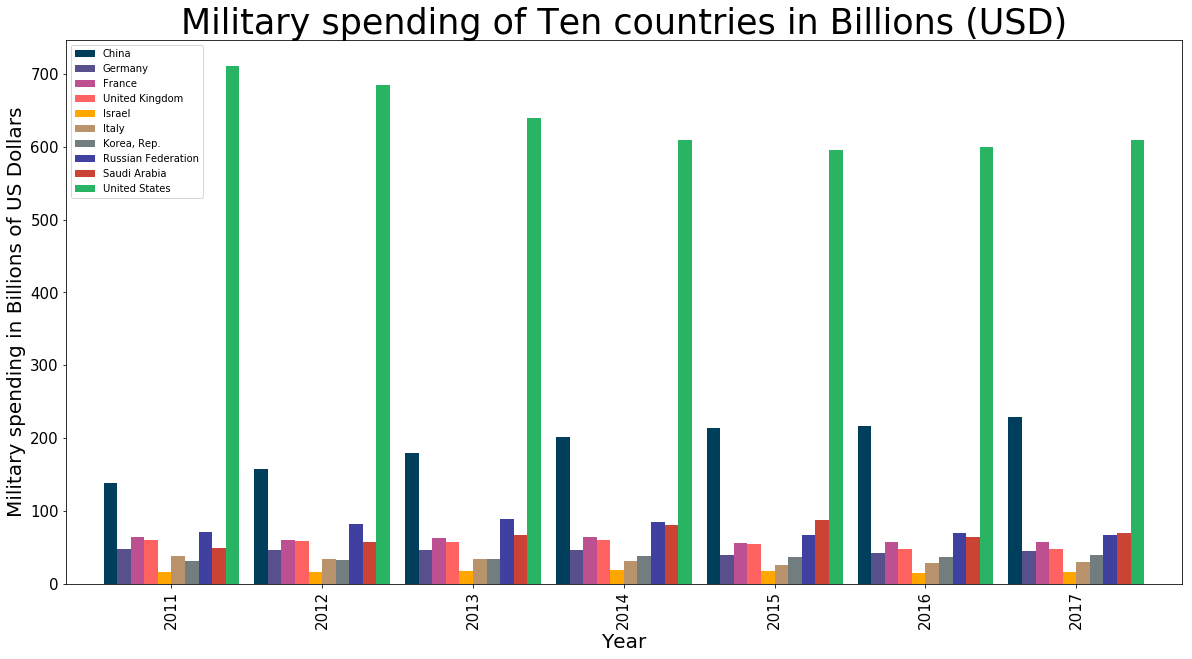

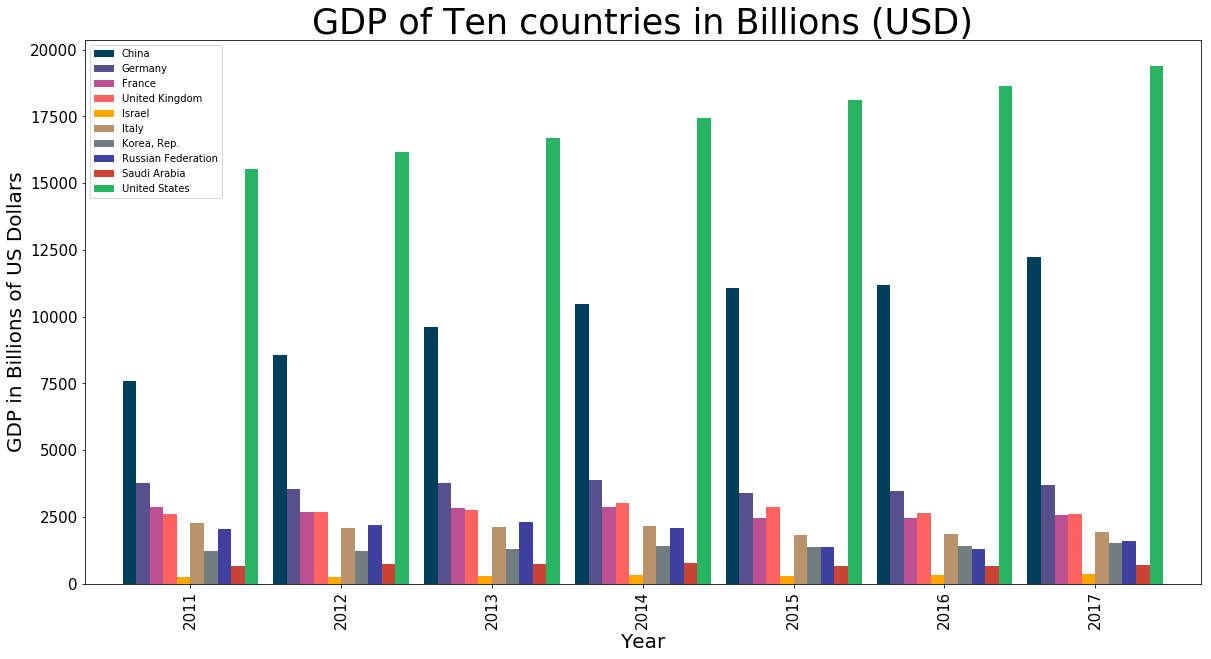

In [10]:
#Plotting a basic graph for the military spending over the years 2011 to 2017
#Taking the transpose so that it helps us plot more easily

mil_spend_new = mil_spend.transpose()
mil_spend_new.head(7)
colors = ['#003f5c', '#58508d', '#bc5090', '#ff6361', '#ffa600', '#b9936c', '#717D7E', '#4040a1','#CB4335','#28B463']


# Question1 : Compare the military data to that country’s GDP
#Code for Military spending plot
axes = mil_spend_new.plot(kind ='bar',figsize=(20,10), width = 0.9, color = colors, fontsize =15)
plt.legend(loc='best')
plt.title('Military spending of Ten countries in Billions (USD)',fontsize =35)
axes.set_xlabel('Year', fontsize=20)
axes.set_ylabel('Military spending in Billions of US Dollars' , fontsize =20)
plt.show()

#Code for GDP plot
axes = gdp.T.plot(kind ='bar', figsize=(20,10),width = 0.9, color = colors,fontsize=15)
plt.legend(loc='best')
plt.title('GDP of Ten countries in Billions (USD)',fontsize =35)
axes.set_xlabel('Year', fontsize=20)
axes.set_ylabel('GDP in Billions of US Dollars' , fontsize =20)
plt.show()

In [11]:

#Comapring the total Military spending data to total GDP over a range of 7 years
#using the sum function

mil_spend['spend_mil'] = mil_spend.T.sum(axis=0)
gdp['spend_gdp'] = gdp.T.sum(axis=0)

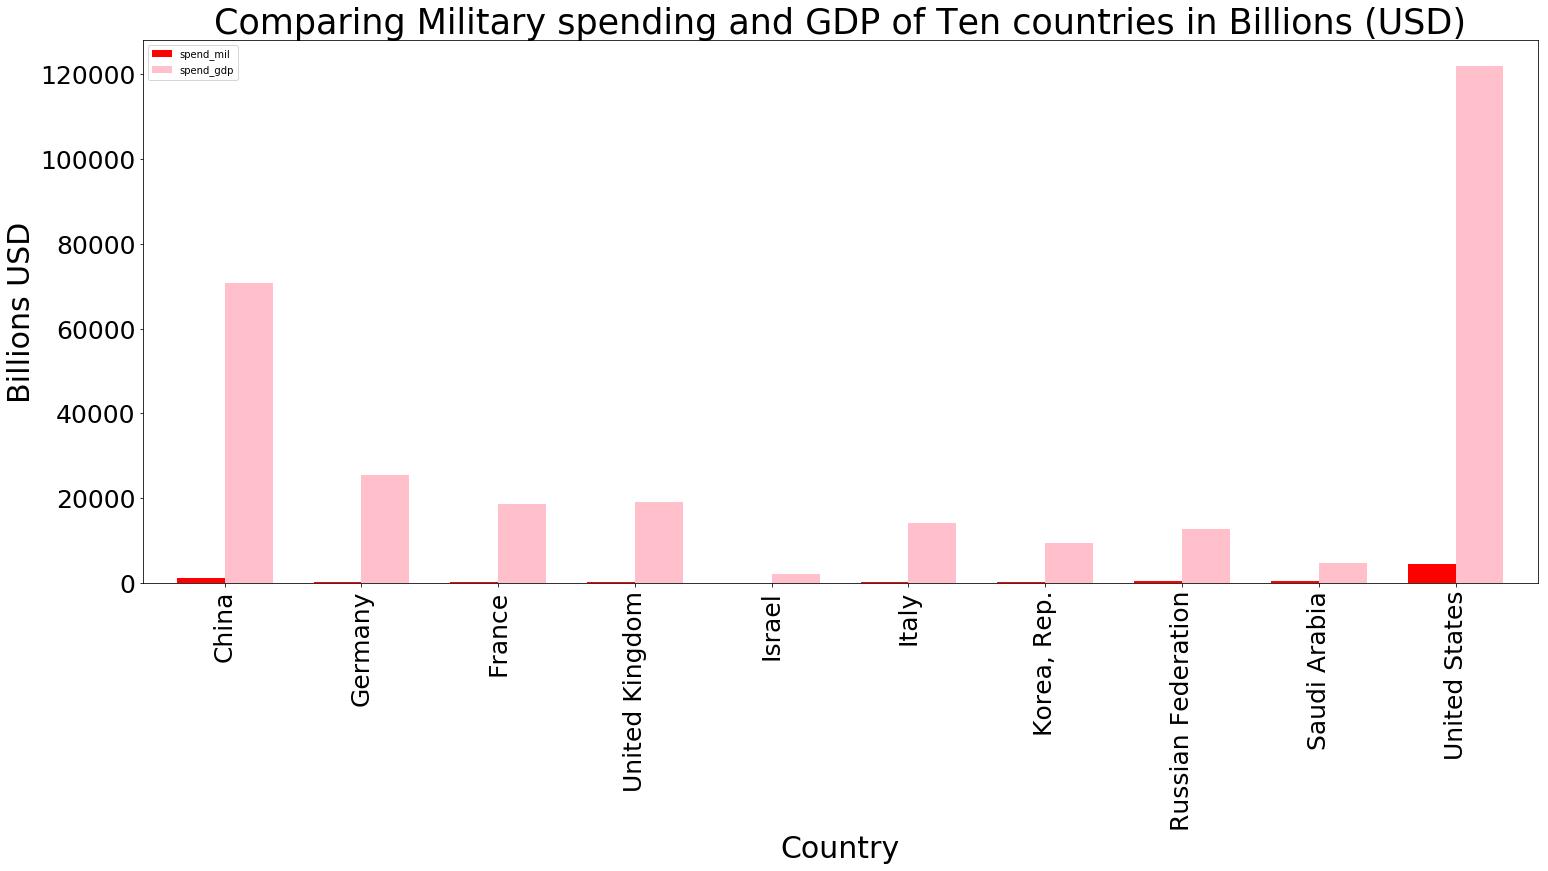

In [12]:
colors=['red','pink']
data = pd.concat([mil_spend.loc[:,['spend_mil']], gdp.loc[:,['spend_gdp']]], axis=1)
data
axes = data.plot(kind ='bar',figsize=(25,10), width = 0.7,color = colors, fontsize =25)
plt.legend(loc='best')
plt.title('Comparing Military spending and GDP of Ten countries in Billions (USD)',fontsize =35)
axes.set_ylabel('Billions USD', fontsize=30)
axes.set_xlabel('Country' , fontsize =30)
plt.show()

# Question:2 Compare the overall military spending of the all 10 countries in absolute and percentages

In [13]:
##Question:2 Compare the overall military spending of the all 10 countries in absolute and percentages

Spending_By_Country = mil_spend.T.sum(axis = 0)
Spending_By_Country = Spending_By_Country.sort_values(ascending = True)
Spending_By_Country

Country 
Israel                 231.765158
Italy                  440.127944
Korea, Rep.            494.580316
Germany                624.731570
United Kingdom         767.969872
France                 842.274837
Saudi Arabia           946.166400
Russian Federation    1053.510661
China                 2668.730718
United States         8903.410126
dtype: float64

Text(0.5, 0, 'Overall Spending in USD Billions')

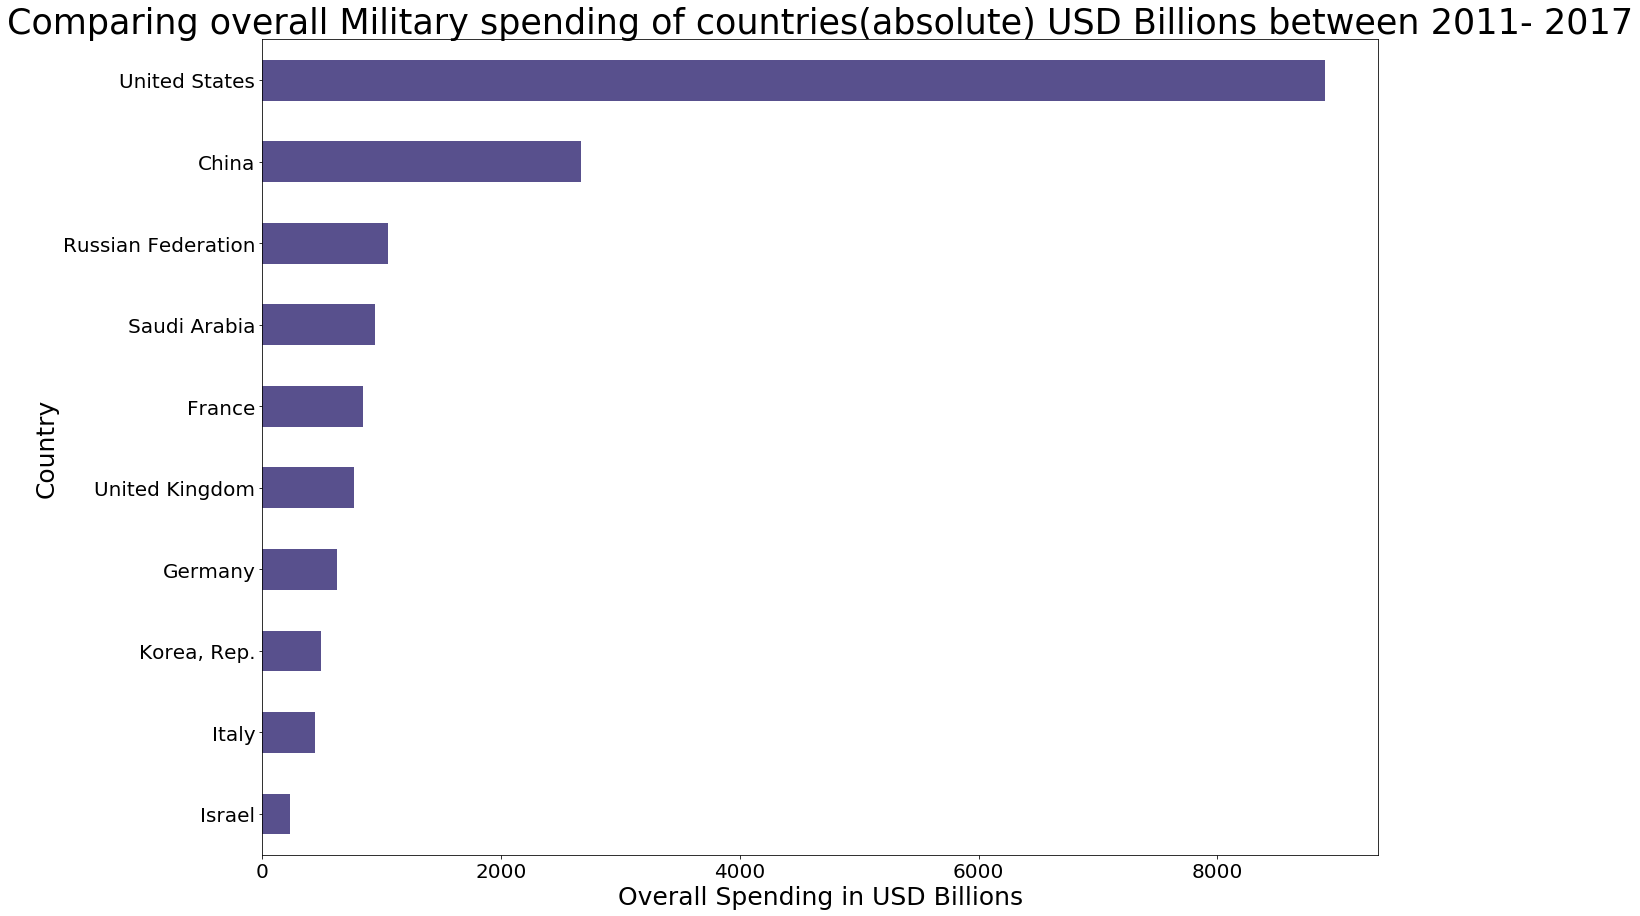

In [14]:
#colors =['blue','green','orange','brown','gold','purple','gold','cyan','grey','black']
axes = pd.Series(Spending_By_Country).plot(kind = 'barh',figsize = (20,15), fontsize = 20, width = .5,color= '#58508d')
plt.title('Comparing overall Military spending of countries(absolute) USD Billions between 2011-2017', fontsize=35)
axes.set_ylabel('Country', fontsize = 25)
axes.set_xlabel('Overall Spending in USD Billions', fontsize = 25)

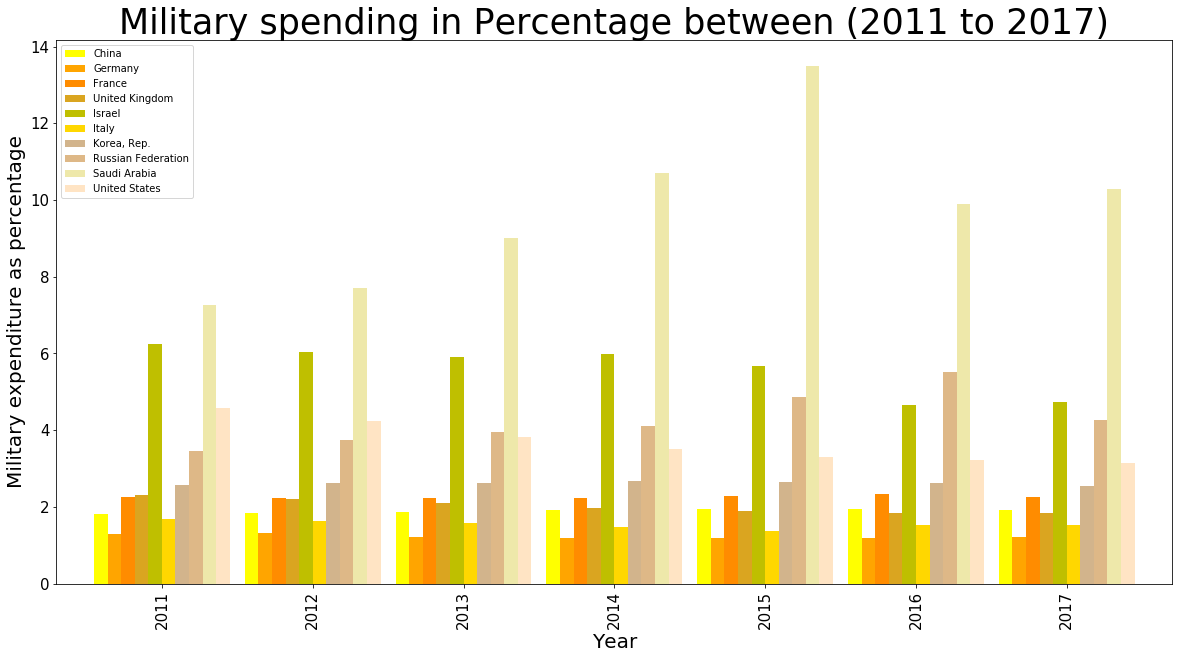

In [23]:
#Code for Military Expenditure Percentage Plot
axes = mil_spend_percent.T.plot(kind ='bar', figsize=(20,10),width = 0.9, color = colors,fontsize=15)
plt.legend(loc='best')
plt.title('Military spending in Percentage between (2011 to 2017)',fontsize =35)
axes.set_xlabel('Year', fontsize=20)
axes.set_ylabel('Military expenditure as percentage' , fontsize =20)
plt.show()

In [16]:
#overall military spending of the all 10 countries in percentages
Spending_By_Country_percent = mil_spend_percent.T.mean(axis = 0)
Spending_By_Country_percent = Spending_By_Country_percent.sort_values(ascending = True)
Spending_By_Country_percent

Country Name
Germany               1.228114
Italy                 1.540155
China                 1.888934
United Kingdom        2.020012
France                2.258156
Korea, Rep.           2.611955
United States         3.687989
Russian Federation    4.267739
Israel                5.605279
Saudi Arabia          9.765063
dtype: float64

Text(0.5, 0, 'Overall percentage')

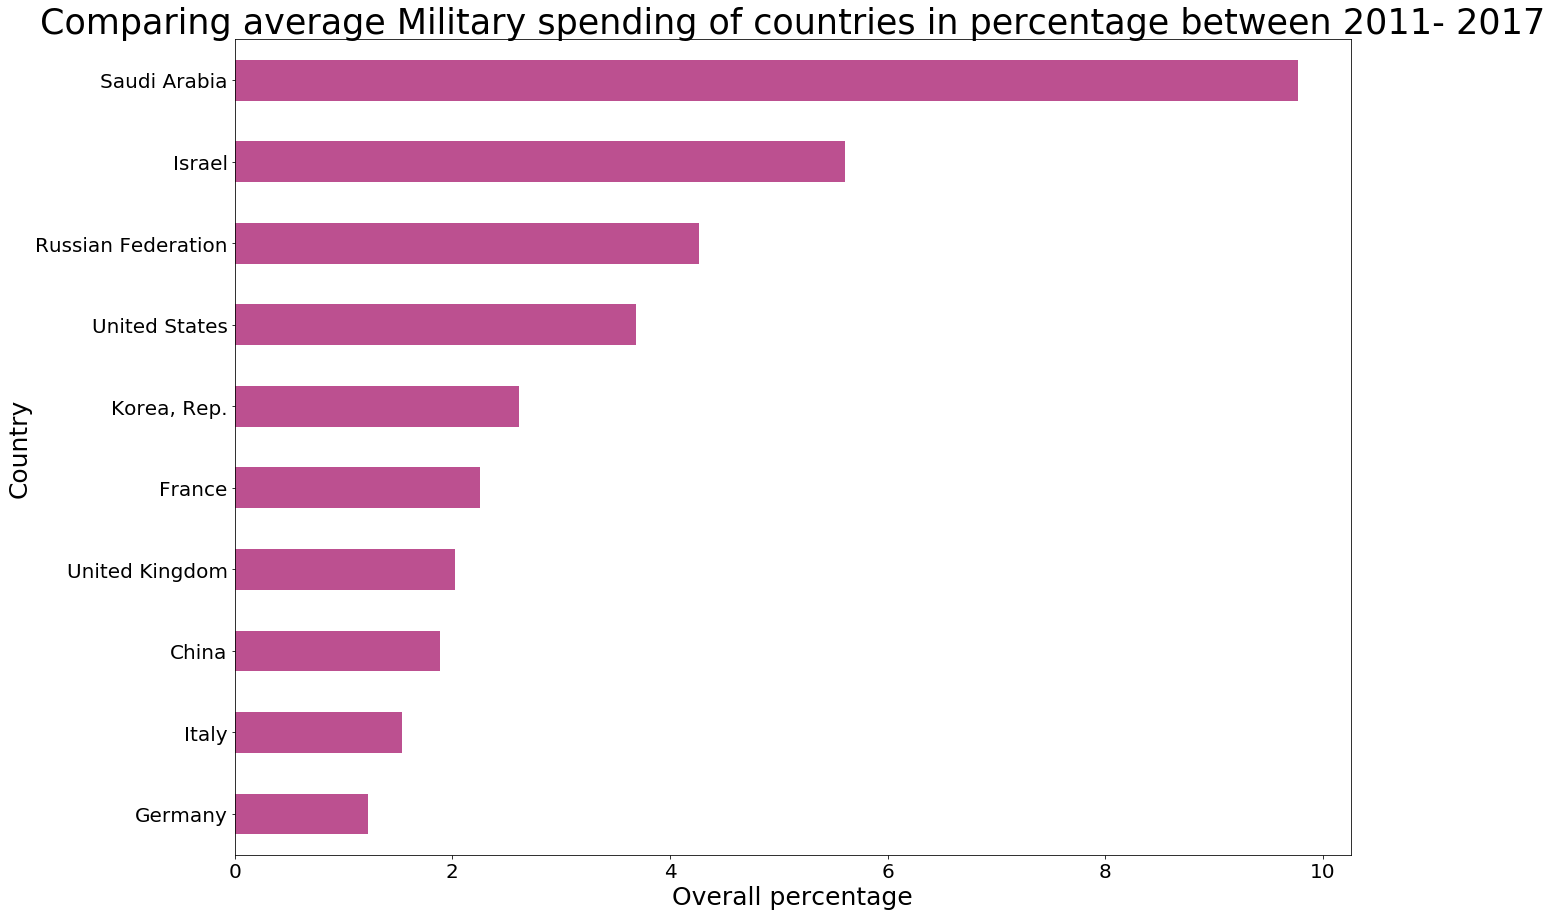

In [17]:
axes = pd.Series(Spending_By_Country_percent).plot(kind = 'barh', figsize = (20,15), fontsize = 20, width = .5,color='#bc5090')
plt.title('Comparing average Military spending of countries in percentage between 2011- 2017',fontsize=35)
axes.set_ylabel('Country', fontsize = 25)
axes.set_xlabel('Overall percentage', fontsize = 25)

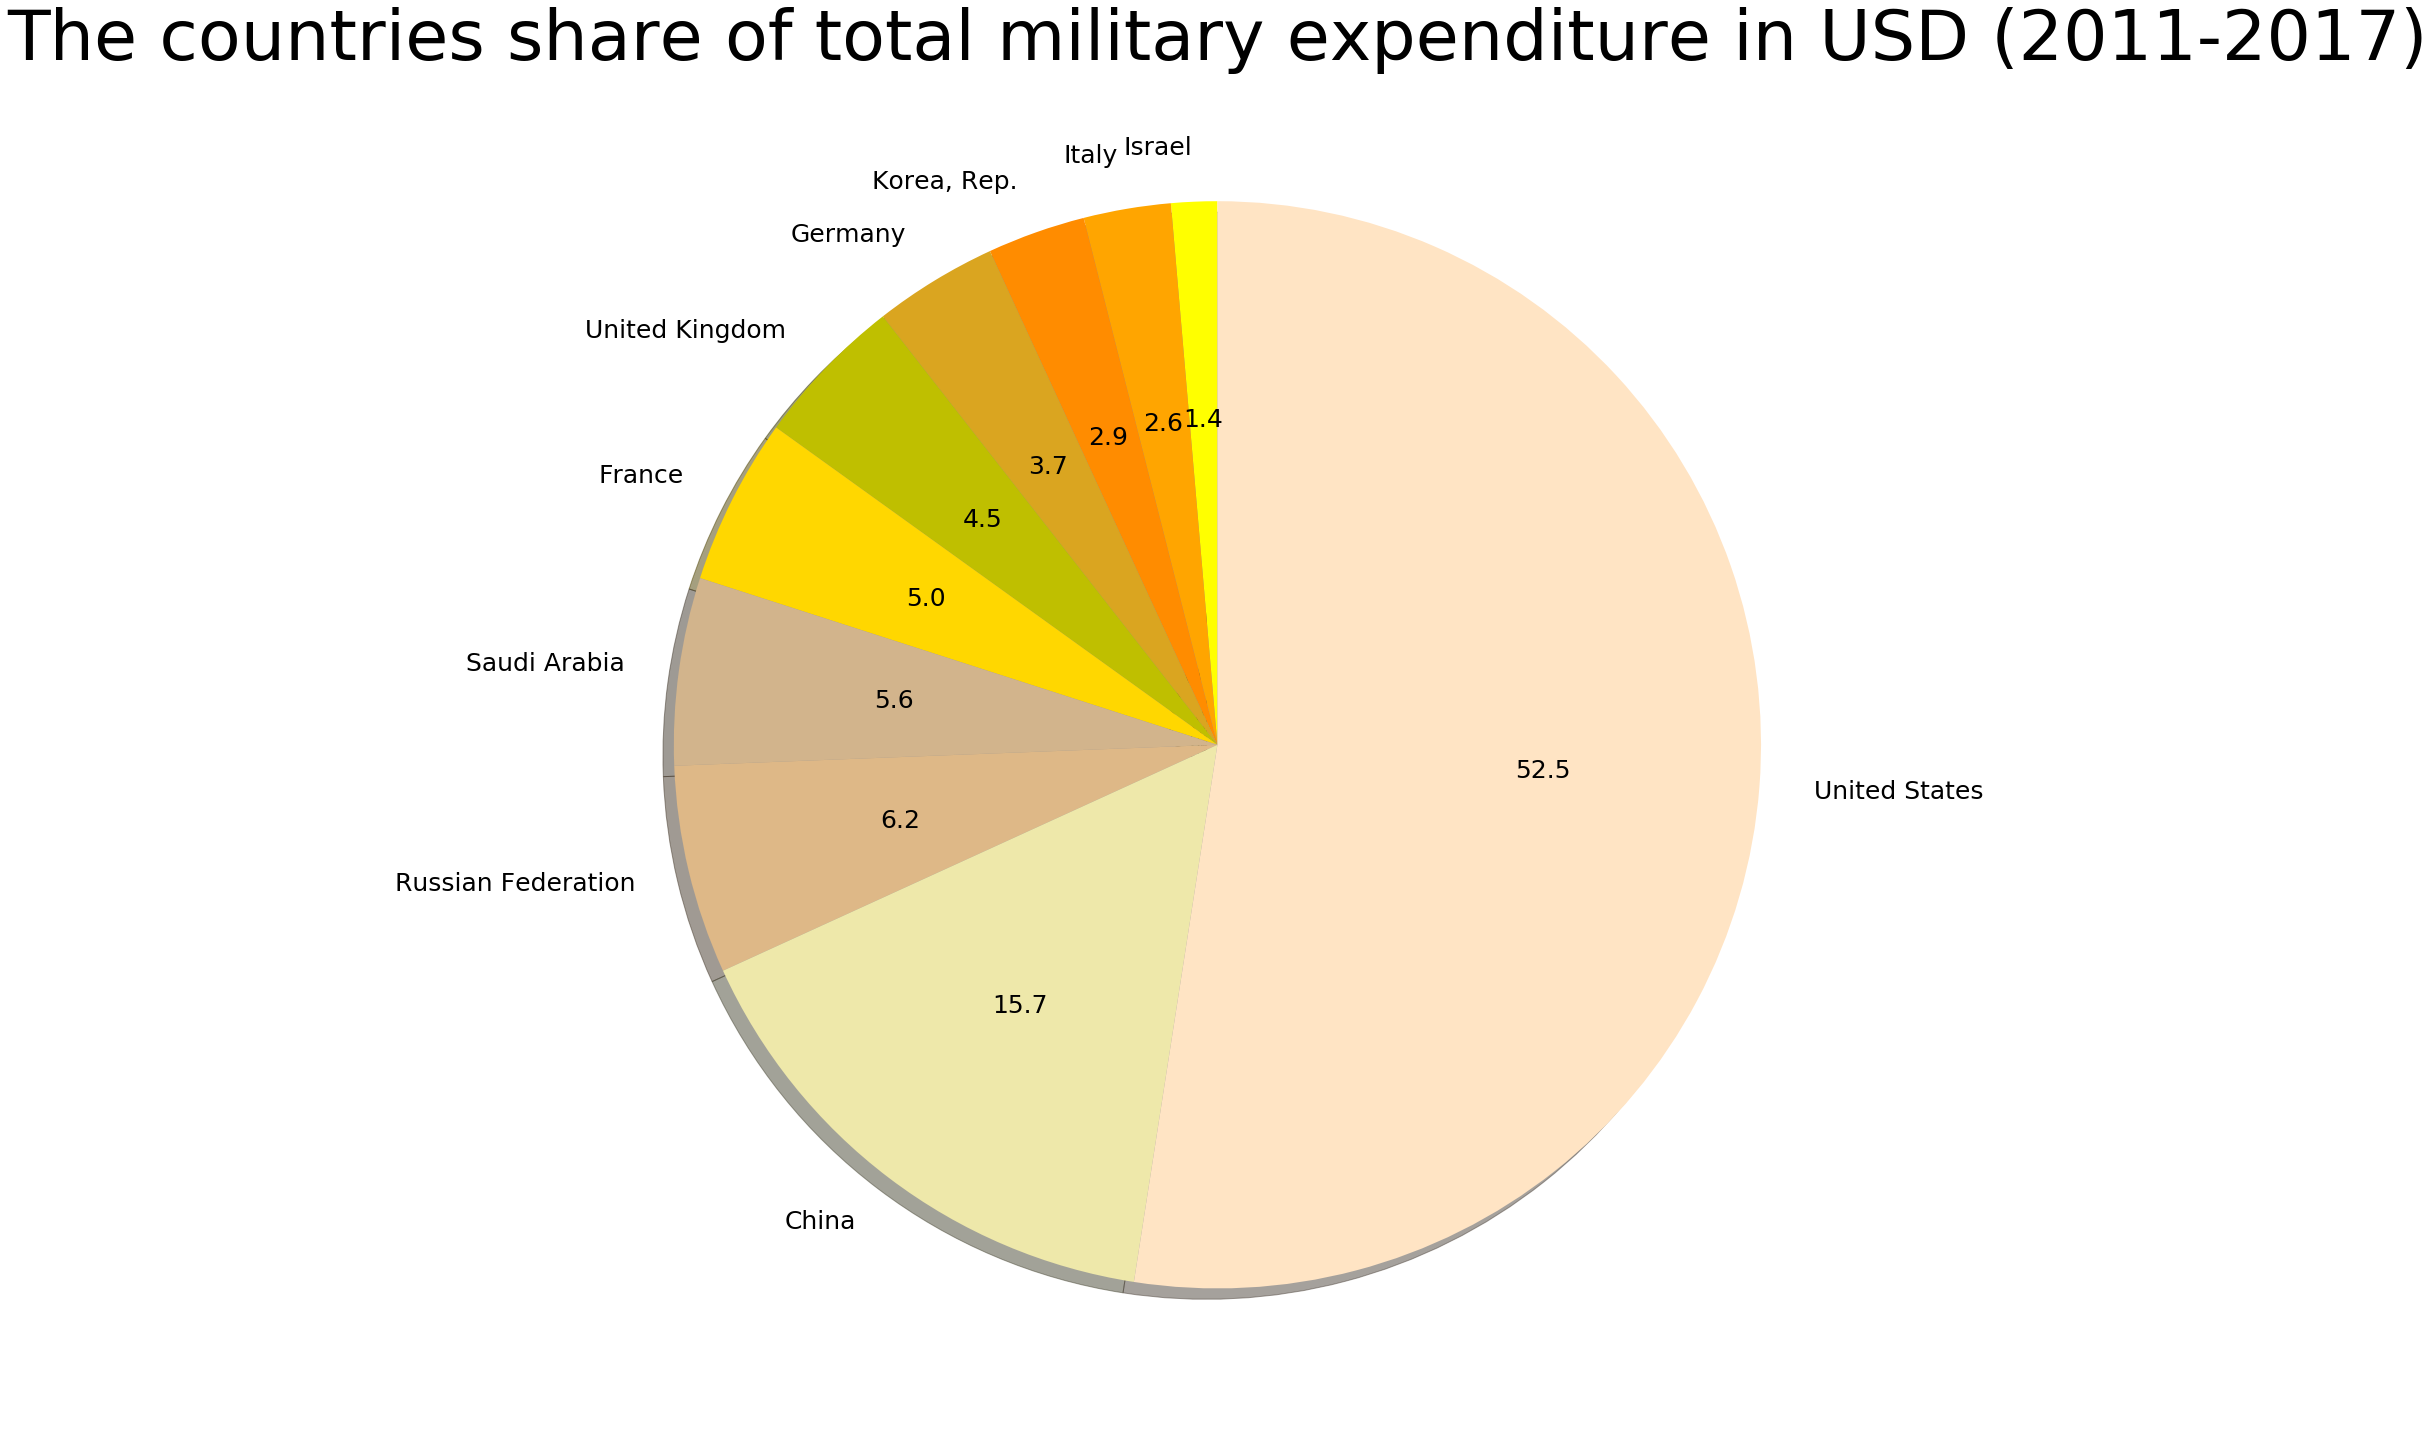

In [22]:
#Code for Plotting Pie chart:   Billions USD

spending_total = Spending_By_Country

colors=['yellow','orange','darkorange','goldenrod','y','gold','tan','burlywood','palegoldenrod','bisque']

plt.title("The countries share of total military expenditure in USD (2011-2017)", fontsize=70)

spending_total.plot(kind='pie',y="% share of military expenditure in percent",legend=False,figsize=(25,25),fontsize=25,autopct='%.1f',colors=colors,shadow=True,startangle=90,label="")
plt.show()

# Question:3  Compare the per person military spending to the per person GDP in absolute and percentages

In [38]:
##Question3: Compare the per person military spending to the per person GDP in absolute and percentages
#3. Let us see the data frame for per person military spending and per person gdp to get insights

mil_spend_per_person.head(10)

,2011,2012,2013,2014,2015,2016,2017
Country Name,,,,,,,
China,102.644316,116.525476,132.520334,147.164567,156.133275,156.695992,164.621679
Germany,599.693032,577.810325,569.535569,569.291798,487.381907,504.920060,536.057581
France,988.646828,914.336685,945.732825,959.247857,831.045716,857.891317,860.716432
United Kingdom,952.757929,918.294839,886.688485,915.956727,827.009480,733.570075,714.805693
Israel,2101.331750,1965.195505,2146.811047,2249.486775,2024.227709,1729.790015,1892.593293
Italy,642.141214,566.558856,562.671302,519.376382,416.505644,465.231879,482.835847
"Korea, Rep.",620.620634,636.491123,676.926216,739.996079,716.863811,720.732539,760.742042
Russian Federation,491.305942,568.913732,615.669976,588.907672,460.930957,479.729528,459.081406
Saudi Arabia,1718.637969,1942.418113,2238.142354,2624.139114,2762.793321,1972.779077,2107.380061


In [39]:
gdp_per_person.head(10)

,2011,2012,2013,2014,2015,2016,2017
Country Name,,,,,,,
China,5633.795717,6337.883323,7077.770765,7683.502613,8069.213024,8117.267465,8826.994096
Germany,46810.327959,44065.248908,46530.911428,48042.563435,41323.921502,42232.574208,44469.909061
France,43790.735399,40874.715956,42592.951519,43008.652570,36613.375216,36870.219134,38476.658636
United Kingdom,41412.349240,41790.779141,42724.067884,46783.469217,44305.554632,40412.033620,39720.443427
Israel,33689.838534,32525.956587,36291.232110,37539.951817,35690.963078,37180.849812,40270.251346
Italy,38334.683850,34814.125117,35370.275258,35396.665724,30180.321515,30668.981429,31952.975921
"Korea, Rep.",24079.788524,24358.782176,25890.018670,27811.366384,27105.076226,27608.247429,29742.838861
Russian Federation,14351.212054,15434.574781,16007.089993,14125.908727,9346.616360,8759.036118,10743.096592
Saudi Arabia,23770.747386,25303.094621,24934.386142,24575.403038,20732.861722,19982.085631,20849.291369


Text(0, 0.5, 'Military percapita')

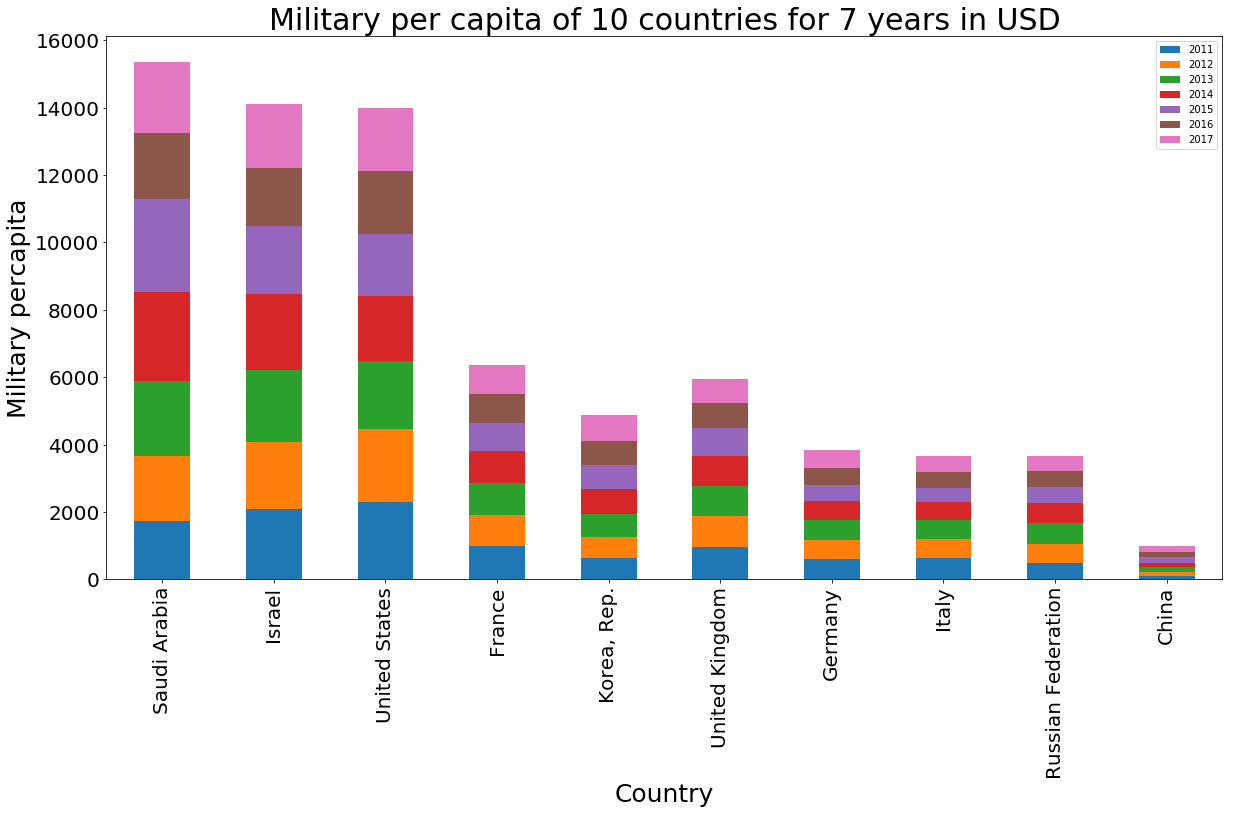

In [40]:
#3.1 Per person Military spending of different countries for 7 Years absolute


ax = mil_spend_per_person.sort_values(by='2017',ascending=False).plot(kind='bar',width=0.5,figsize=(20,10),stacked = True,fontsize=20)
plt.title("Military per capita of 10 countries for 7 years in USD", fontsize=30)
ax.set_xlabel("Country", fontsize=25)
ax.set_ylabel("Military percapita", fontsize=25)

Text(0, 0.5, 'GDP percapita')

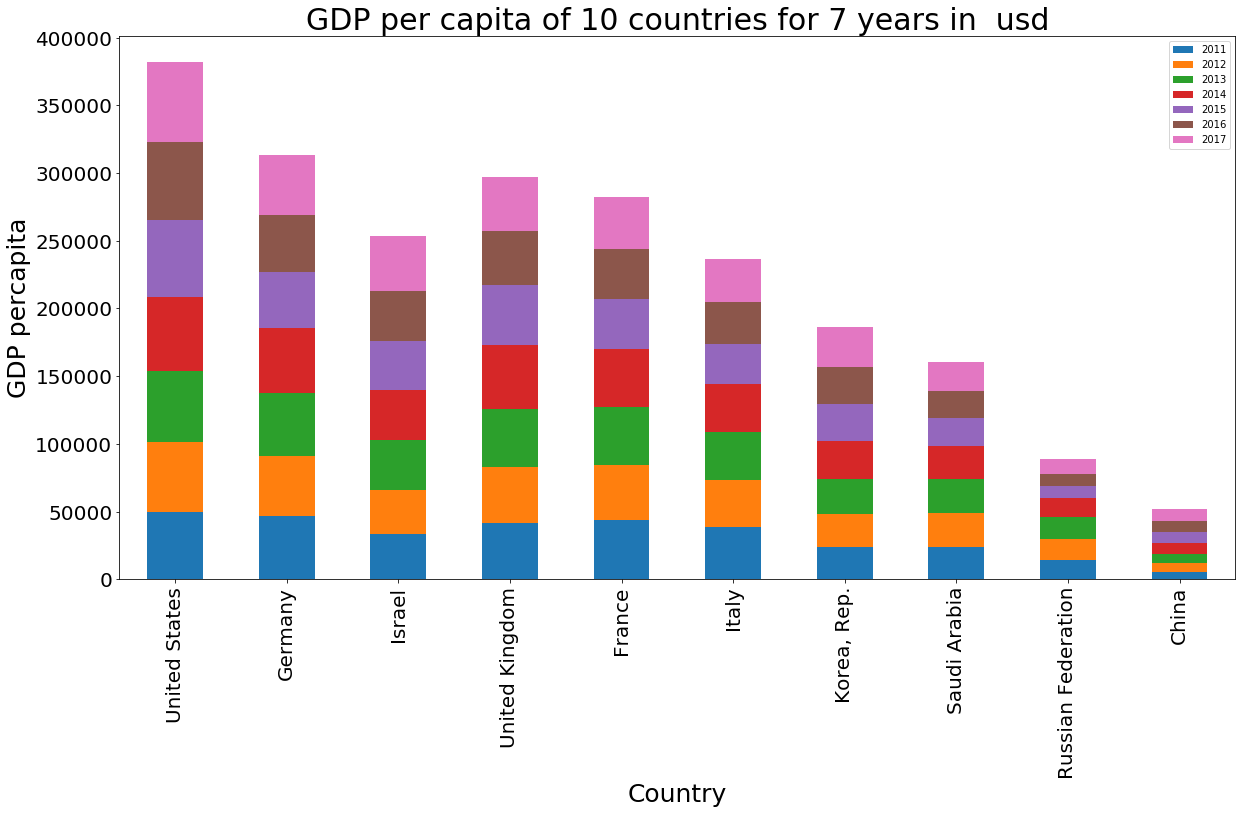

In [41]:
##Question3: Compare the per person military spending to the per person GDP in absolute
#3.2 Per person GDP of countries for 7 years
ax = gdp_per_person.sort_values(by='2017',ascending=False).plot(kind='bar',width=0.5,figsize=(20,10),stacked = True,fontsize=20)
plt.title("GDP per capita of 10 countries for 7 years in  usd",fontsize=30)
ax.set_xlabel("Country",fontsize=25)
ax.set_ylabel("GDP percapita",fontsize=25)

In [42]:
#Compare the per capita military spending to per capita GDP 

#Combing columns using the concatenate function into a new dataframe
df = pd.concat([gdp_per_person.loc[:,['2017']], mil_spend_per_person.loc[:,['2017']]], axis=1)
df.columns = ['PerCapita_GDP', 'PerCapita_Military']


In [43]:
df.columns

Index(['PerCapita_GDP', 'PerCapita_Military'], dtype='object')

In [44]:
df.head(10)

,PerCapita_GDP,PerCapita_Military
Country Name,,
China,8826.994096,164.621679
Germany,44469.909061,536.057581
France,38476.658636,860.716432
United Kingdom,39720.443427,714.805693
Israel,40270.251346,1892.593293
Italy,31952.975921,482.835847
"Korea, Rep.",29742.838861,760.742042
Russian Federation,10743.096592,459.081406
Saudi Arabia,20849.291369,2107.380061


In [45]:
colors =[ '#ffa600','#4040a1']

#function to plot
def plot_percapita(df, limit=10):
    df = df.ix[:, ['PerCapita_GDP', 'PerCapita_Military']][:limit]
    df['Total_GDP_capita '] =df['PerCapita_GDP']- df['PerCapita_Military'] 
    del df['PerCapita_GDP']
    df.plot(kind='bar',figsize=(20,10),stacked=True, sort_columns=True,color=colors,fontsize=25)
    plt.title("Per person military spending compared to the per person GDP in absolute for the Year 2017",fontsize=30)
    plt.ylabel('Value in USD',fontsize=30)
    plt.xlabel('Country',fontsize=30)
    plt.show()

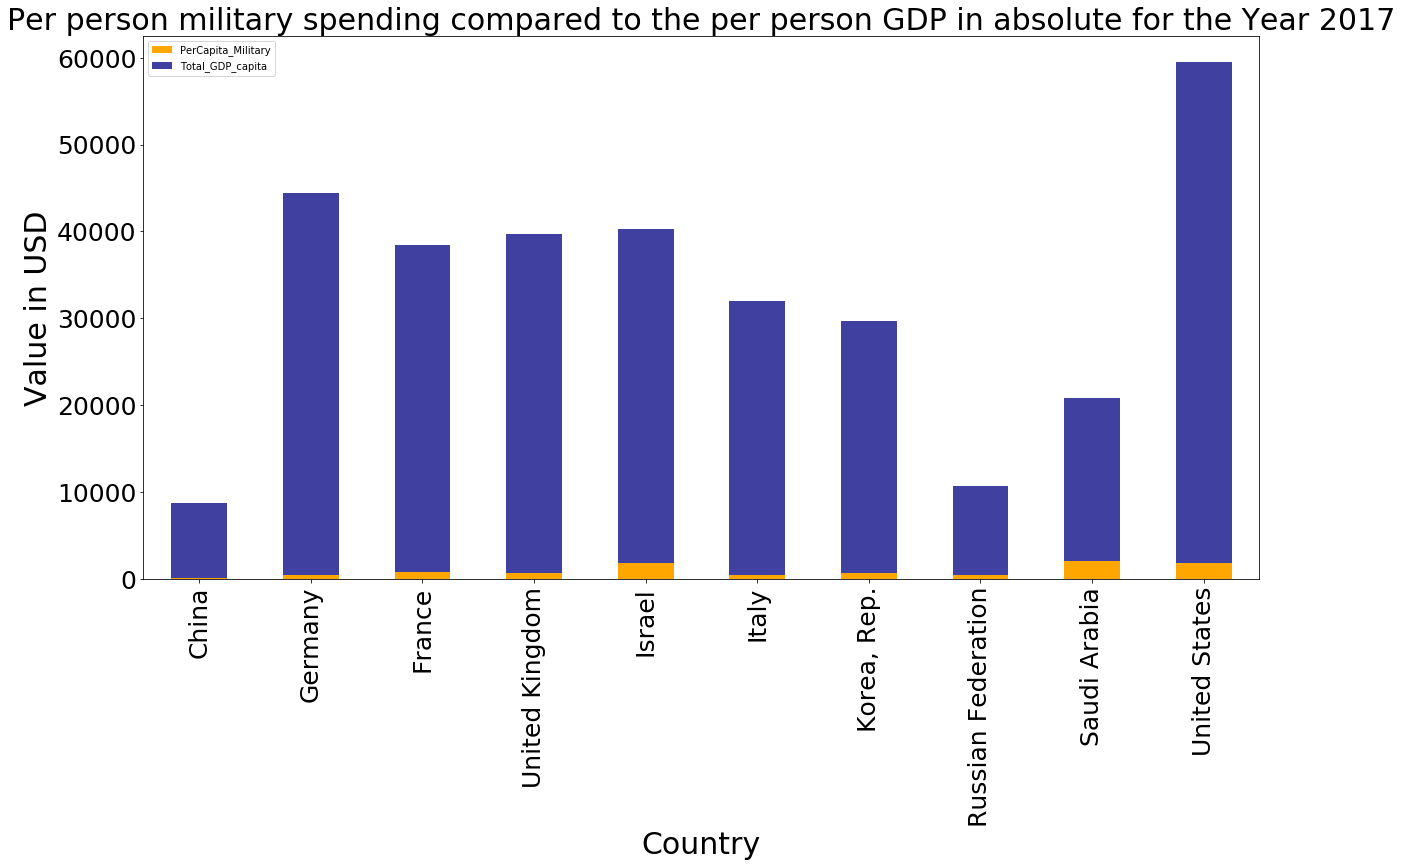

In [46]:
import warnings
warnings.filterwarnings('ignore')
plot_percapita(df)


In [47]:
#Calculating the average of gdp and military per capita
#By adding a new columns


df['Avg_gdp_percapita'] = gdp_per_person.mean(axis = 1)
df['Avg_mil_percapita']= mil_spend_per_person.mean(axis = 1)
df.columns
df.sort_values(by='Avg_gdp_percapita', inplace=True, ascending=False)
df.head(5)

,PerCapita_GDP,PerCapita_Military,Avg_gdp_percapita,Avg_mil_percapita
Country Name,,,,
United States,59531.661964,1872.035858,54612.500370,1997.845467
Germany,44469.909061,536.057581,44782.208072,549.241467
United Kingdom,39720.443427,714.805693,42449.813880,849.869033
France,38476.658636,860.716432,40318.186919,908.231094
Israel,40270.251346,1892.593293,36169.863326,2015.633728


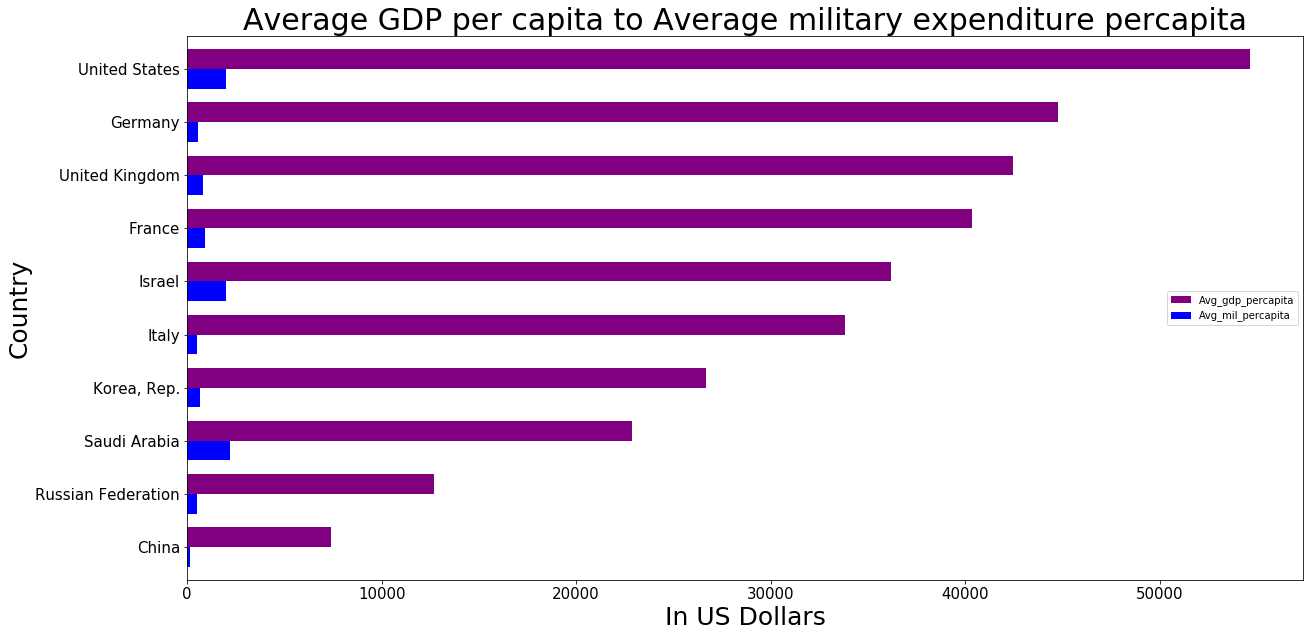

In [48]:
#Plotting the Average GDP per capita and Military per capita

colors=['purple','blue']
#plt.style.use('bmh')
df.plot(y = ['Avg_gdp_percapita', 'Avg_mil_percapita'], kind='barh', figsize = (20,10),color=colors,width=0.75, fontsize = 15).invert_yaxis()
plt.legend(loc = 'center right')
plt.xlabel('In US Dollars', fontsize = 25)
plt.ylabel('Country', fontsize = 25)
plt.title('Average GDP per capita to Average military expenditure percapita', fontsize = 30)
plt.show()

In [49]:
mil_gdp_per_person_percent.head(10)

,2011,2012,2013,2014,2015,2016,2017
Country Name,,,,,,,
China,1.821939,1.838555,1.872346,1.915332,1.934926,1.930403,1.864980
Germany,1.281113,1.311261,1.223994,1.184974,1.179418,1.195570,1.205439
France,2.257662,2.236925,2.220397,2.230360,2.269787,2.326787,2.236983
United Kingdom,2.300661,2.197362,2.075384,1.957864,1.866605,1.815227,1.799591
Israel,6.237286,6.041930,5.915509,5.992247,5.671541,4.652368,4.699731
Italy,1.675092,1.627382,1.590803,1.467303,1.380057,1.516946,1.511083
"Korea, Rep.",2.577351,2.612984,2.614622,2.660769,2.644759,2.610570,2.557732
Russian Federation,3.423446,3.685970,3.846233,4.168990,4.931528,5.476967,4.273269
Saudi Arabia,7.230054,7.676603,8.976128,10.677909,13.325673,9.872739,10.107682


Text(0, 0.5, 'Percentage ratio of percapita (military to gdp)')

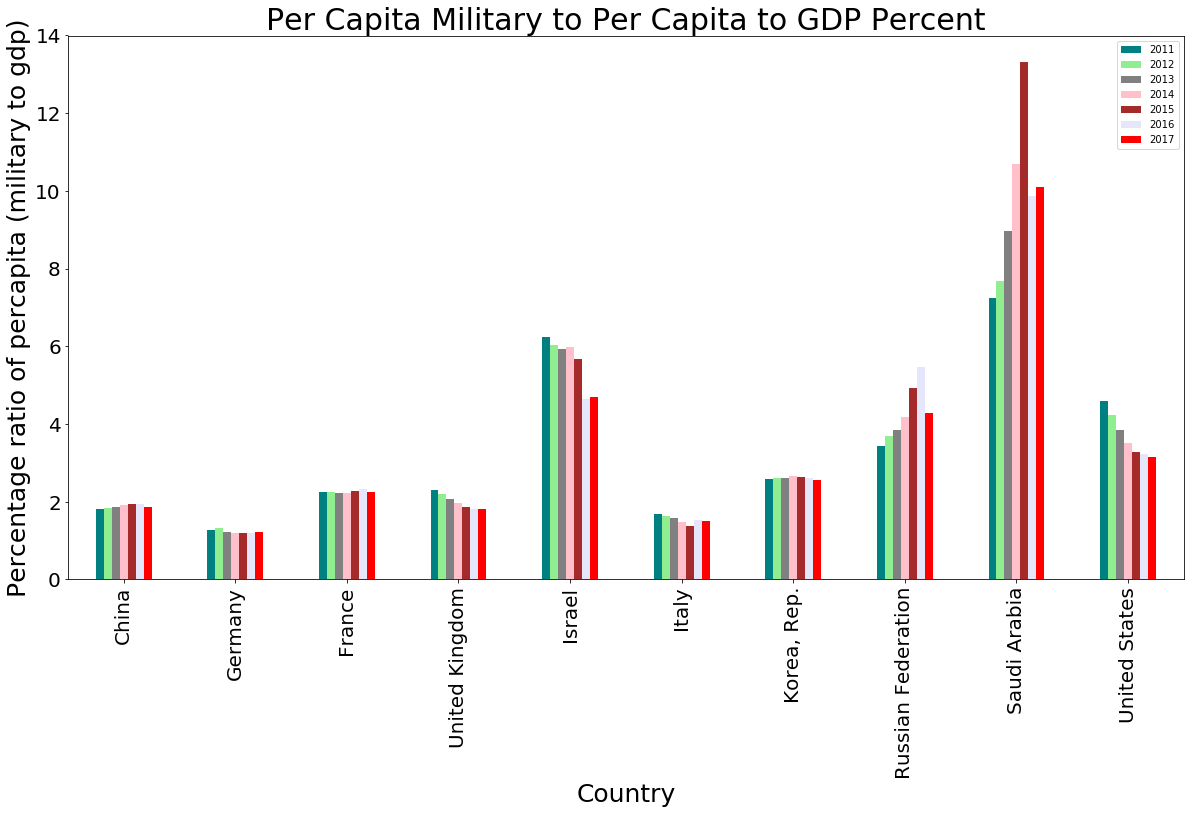

In [50]:

#plotting the military percapita to GDP percapita ratio in percent
colors = ['Teal', 'lightgreen', 'grey', 'pink', 'brown', 'lavender','red']
ax = mil_gdp_per_person_percent.plot(kind='bar',width=0.5,figsize=(20,10),fontsize=20,color=colors)
plt.title("Per Capita Military to Per Capita to GDP Percent", fontsize=30)
ax.set_xlabel("Country",fontsize=25)
ax.set_ylabel("Percentage ratio of percapita (military to gdp)",fontsize=25)

# Question4:  Single out the fastest growing countries in military spending in absolute and percentage


In [51]:
mil_fastest_growing= pd.read_excel("/Users/varsha/GWU_SPRING2019/DATA_MINING/Final_Project1/Military_millions_T.xlsx",index_col=0)
mil_fastest_growing_percent=pd.read_excel("/Users/varsha/GWU_SPRING2019/DATA_MINING/Final_Project1/Military_Percent_T.xlsx",index_col=0)

#Book1.xlsx

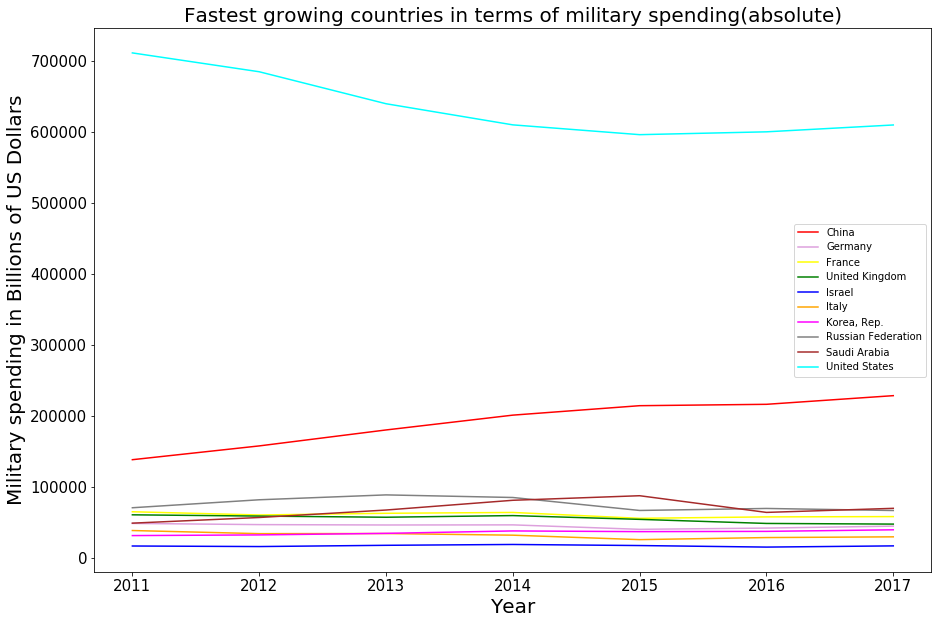

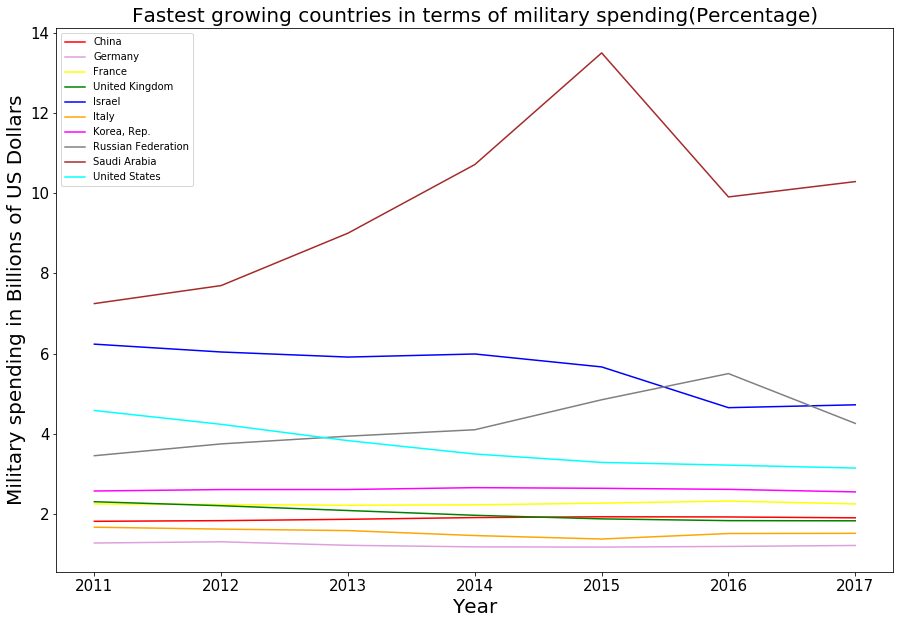

In [52]:
#Single out the fastest growing countries in military spending in absolute and percentage
colors = ['Red', 'Plum', 'Yellow', 'Green', 'Blue', 'Orange','Magenta', 'Grey', 'Brown', 'Cyan']
#colors = ['#003f5c', '#58508d', '#bc5090', '#ff6361', '#ffa600', '#b9936c', '#717D7E', '#4040a1','#CB4335','#28B463']


axes = mil_fastest_growing.plot.line(figsize=(15,10), color=colors,fontsize =15)
plt.title('Fastest growing countries in terms of military spending(absolute)', fontsize = 20)
plt.legend(loc='best')
axes.set_xlabel('Year', fontsize=20)
axes.set_ylabel('Military spending in Billions of US Dollars' , fontsize =20)
#plt.figure(figsize=(30,15))
plt.show()


#colors = ['Red', 'Plum', 'Yellow', 'Green', 'Blue', 'Orange','Magenta', 'Grey', 'Brown', 'Cyan']

axes = mil_fastest_growing_percent.plot.line(figsize=(15,10), color=colors,fontsize =15)
plt.title ('Fastest growing countries in terms of military spending(Percentage)', fontsize = 20)
plt.legend(loc='best')
axes.set_xlabel('Year', fontsize=20)
axes.set_ylabel('Military spending in Billions of US Dollars' , fontsize =20)
#plt.figure(figsize=(30,15))
plt.show()

In [53]:
# Calculating the growth rate between the year 2016 to 2017: creating a new field to calculate the percent change and growth rate

mil_spend_c = mil_spend.copy()

mil_spend_c['2016 to 2017'] = np.round(mil_spend_c['2017'] - mil_spend_c['2016'], 2)
mil_spend_c['Percent 2016 to 2017'] = np.round(mil_spend_c['2016 to 2017']/mil_spend_c['2016'] *100, 2)
mil_spend_c.head(3)
# PERCENT CHANGE
percent_change = mil_spend_c.sort_values('Percent 2016 to 2017', ascending = False)
percent_change = percent_change.head(10)
percent_change

,2011,2012,2013,2014,2015,2016,2017,spend_mil,2016 to 2017,Percent 2016 to 2017
Country,,,,,,,,,,
Israel,16.318522,15.545679,17.302224,18.481108,16.963231,14.782785,16.489030,115.882579,1.71,11.57
Saudi Arabia,48.530933,56.497867,67.020000,80.762400,87.185867,63.672800,69.413333,473.083200,5.74,9.01
Germany,48.140348,46.470871,45.930541,46.102673,39.812576,41.579495,44.329282,312.365785,2.75,6.61
"Korea, Rep.",30.991708,31.951761,34.136640,37.552329,36.570769,36.934448,39.152503,247.290158,2.22,6.01
China,137.967304,157.390377,179.880451,200.772204,214.093070,216.031280,228.230672,1334.365359,12.20,5.65
Italy,38.129991,33.732754,33.891914,31.572444,25.294630,28.205845,29.236394,220.063972,1.03,3.65
United States,711.338000,684.780000,639.704000,609.914000,596.104639,600.106443,609.757981,4451.705063,9.65,1.61
France,64.600927,60.035154,62.417099,63.613569,55.342132,57.358414,57.770123,421.137418,0.41,0.71
United Kingdom,60.270436,58.495657,56.861760,59.182859,53.862185,48.118944,47.193097,383.984936,-0.93,-1.93


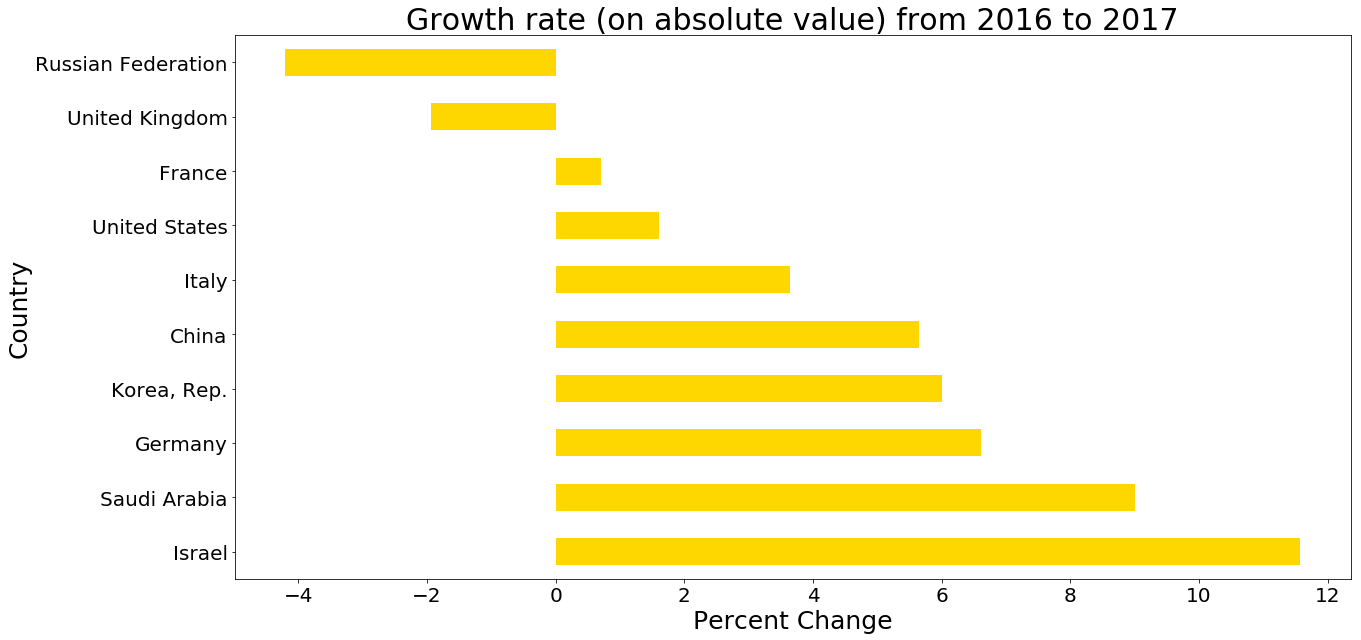

In [54]:
#PLOT PERCENT CHANGE

ax = percent_change['Percent 2016 to 2017'].plot(kind='barh',width=0.5, use_index=True, color = "gold", fontsize=20,figsize=(20,10))
ax.set_xlabel("Percent Change", fontsize=25)
ax.set_ylabel("Country", fontsize=25)
plt.title("Growth rate (on absolute value) from 2016 to 2017", fontsize=30)
#plt.grid()
plt.show()

In [55]:
# Calculating the growth rate between the year 2011 to 2017: 
#creating a new field to calculate the percent change and growth rate

mil_spend_cnew = mil_spend.copy()

mil_spend_cnew['2011 to 2017'] = np.round(mil_spend_cnew['2017'] - mil_spend_cnew['2011'], 2)
mil_spend_cnew['Percent 2011 to 2017'] = np.round(mil_spend_cnew['2011 to 2017']/mil_spend_cnew['2011'] *100, 2)
# PERCENT CHANGE
percent_change = mil_spend_cnew.sort_values('Percent 2011 to 2017', ascending = False)
percent_change = percent_change.head(10)
percent_change

,2011,2012,2013,2014,2015,2016,2017,spend_mil,2011 to 2017,Percent 2011 to 2017
Country,,,,,,,,,,
China,137.967304,157.390377,179.880451,200.772204,214.093070,216.031280,228.230672,1334.365359,90.26,65.42
Saudi Arabia,48.530933,56.497867,67.020000,80.762400,87.185867,63.672800,69.413333,473.083200,20.88,43.02
"Korea, Rep.",30.991708,31.951761,34.136640,37.552329,36.570769,36.934448,39.152503,247.290158,8.16,26.33
Israel,16.318522,15.545679,17.302224,18.481108,16.963231,14.782785,16.489030,115.882579,0.17,1.04
Russian Federation,70.237524,81.469400,88.352896,84.696505,66.418708,69.245309,66.334988,526.755331,-3.90,-5.55
Germany,48.140348,46.470871,45.930541,46.102673,39.812576,41.579495,44.329282,312.365785,-3.81,-7.91
France,64.600927,60.035154,62.417099,63.613569,55.342132,57.358414,57.770123,421.137418,-6.83,-10.57
United States,711.338000,684.780000,639.704000,609.914000,596.104639,600.106443,609.757981,4451.705063,-101.58,-14.28
United Kingdom,60.270436,58.495657,56.861760,59.182859,53.862185,48.118944,47.193097,383.984936,-13.08,-21.70


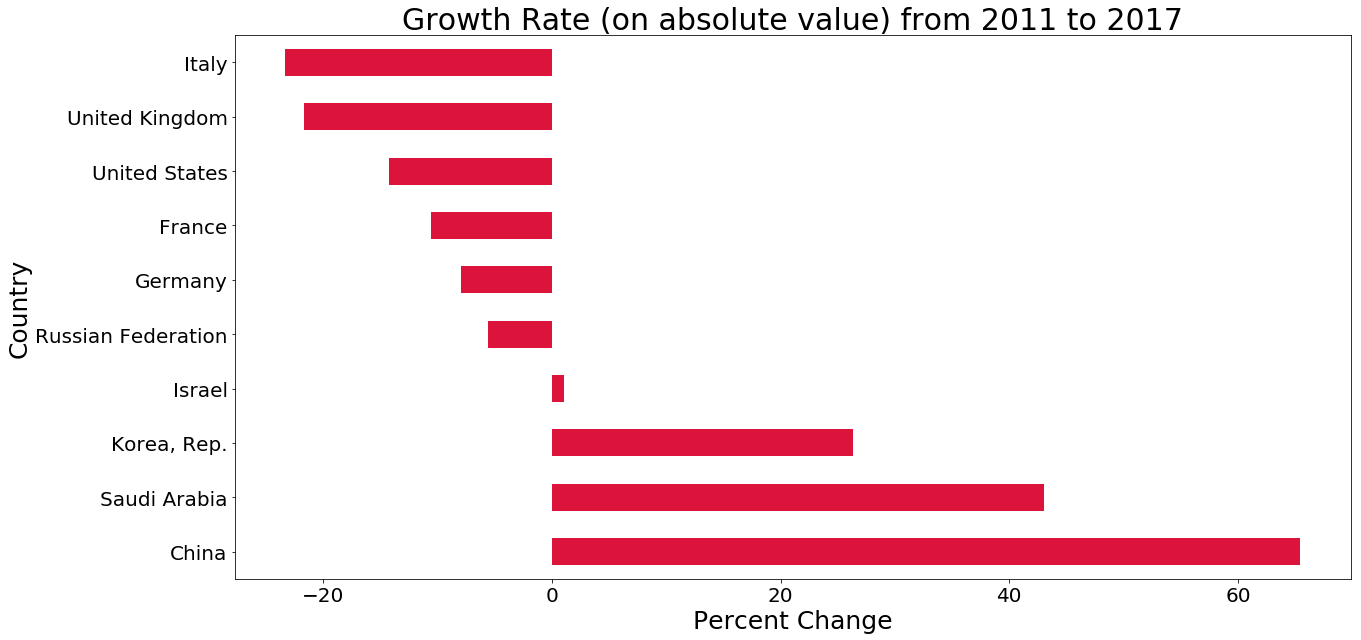

In [56]:
#PLOT PERCENT CHANGE

ax = percent_change['Percent 2011 to 2017'].plot(kind='barh', use_index=True, color = "crimson", fontsize=20,figsize=(20,10))
ax.set_xlabel("Percent Change", fontsize=25)
ax.set_ylabel("Country", fontsize=25)
plt.title("Growth Rate (on absolute value) from 2011 to 2017", fontsize=30)
#plt.grid()
plt.show()